In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
DATADIR = 'C:/Users/yadav/Desktop/Data science/Projects/Celeb face/train/'

In [38]:
'''
0. Ben Affleck
1. Elton John
2. Jerry Seinfield
3. Madonna
4. Mindy Kaling
'''

'\n0. Ben Affleck\n1. Elton John\n2. Jerry Seinfield\n3. Madonna\n4. Mindy Kaling\n'

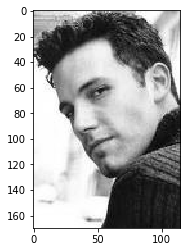

In [4]:
for actor in os.listdir(DATADIR):
    path = os.path.join(DATADIR, actor)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img),0)
        plt.imshow(img_arr, cmap='gray')
        break
    break

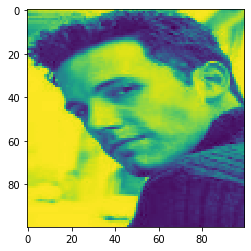

In [8]:
new_arr = cv2.resize(img_arr, (100, 100))
plt.imshow(new_arr)

In [9]:
X = []
y = []


In [10]:
def get_train_data():
    i = 0
    for actor in os.listdir(DATADIR):
        path = os.path.join(DATADIR, actor)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0)
                new_arr = cv2.resize(img_arr, (100, 100))
                X.append([new_arr, i])
            except Exception as e:
                pass
        i += 1
get_train_data()

In [11]:
import random
random.shuffle(X)

In [12]:
X_train = []
y_train = []

for features, label in X:
    X_train.append(features)
    y_train.append(label)

In [13]:
X_train = np.array(X_train)
X_train = X_train/255
X_train

array([[[0.30196078, 0.22745098, 0.05490196, ..., 0.85882353,
         0.85098039, 0.85098039],
        [0.2627451 , 0.19215686, 0.03529412, ..., 0.86666667,
         0.87058824, 0.87058824],
        [0.24705882, 0.17647059, 0.03529412, ..., 0.87058824,
         0.88235294, 0.88235294],
        ...,
        [0.67058824, 0.6627451 , 0.6       , ..., 0.05882353,
         0.        , 0.00392157],
        [0.63529412, 0.61960784, 0.51372549, ..., 0.03529412,
         0.        , 0.00392157],
        [0.57647059, 0.56862745, 0.45098039, ..., 0.05490196,
         0.        , 0.00392157]],

       [[0.86666667, 0.8627451 , 0.86666667, ..., 0.66666667,
         0.68235294, 0.69019608],
        [0.8627451 , 0.8627451 , 0.86666667, ..., 0.2627451 ,
         0.36862745, 0.36470588],
        [0.84705882, 0.86666667, 0.87058824, ..., 0.16862745,
         0.19215686, 0.30588235],
        ...,
        [0.35294118, 0.35294118, 0.36470588, ..., 0.36470588,
         0.40392157, 0.29411765],
        [0.3

In [14]:
X_train = X_train.reshape(-1, 100, 100, 1)

In [15]:
X_train.shape

(93, 100, 100, 1)

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train = np.array(y_train)
y_train.shape

Using Theano backend.


(93, 5)

In [17]:
test_data = []
DATADIR = 'C:/Users/yadav/Desktop/Data science/Projects/Celeb face/val/'
def create_test_data():
    i = 0
    for actor in os.listdir(DATADIR):
        path = os.path.join(DATADIR, actor)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0)
                new_arr = cv2.resize(img_arr, (100, 100))
                test_data.append([new_arr, i])
            except Exception as e:
                pass
        i += 1
create_test_data()

In [18]:
random.shuffle(test_data)

In [19]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [20]:
y_test = np.array(y_test)
y_test = to_categorical(y_test)
y_test.shape

(25, 5)

In [22]:
X_test = np.array(X_test).reshape(-1, 100, 100, 1)
X_test = X_test/255
X_test

array([[[[0.09411765],
         [0.09411765],
         [0.09411765],
         ...,
         [0.28235294],
         [0.20784314],
         [0.17647059]],

        [[0.08627451],
         [0.08627451],
         [0.08627451],
         ...,
         [0.29411765],
         [0.21568627],
         [0.18039216]],

        [[0.08627451],
         [0.08627451],
         [0.08627451],
         ...,
         [0.30196078],
         [0.21568627],
         [0.18039216]],

        ...,

        [[0.67058824],
         [0.6745098 ],
         [0.67843137],
         ...,
         [0.15294118],
         [0.15294118],
         [0.14901961]],

        [[0.6745098 ],
         [0.67843137],
         [0.68235294],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14117647]],

        [[0.67843137],
         [0.67843137],
         [0.68627451],
         ...,
         [0.14509804],
         [0.15294118],
         [0.14509804]]],


       [[[0.05098039],
         [0.04705882],
         [0.03

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [24]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
93/93 [==============================] - 4s 48ms/step - loss: 1.7104 - acc: 0.2366
Epoch 2/10
93/93 [==============================] - 4s 47ms/step - loss: 1.6183 - acc: 0.1505
Epoch 3/10
93/93 [==============================] - 4s 47ms/step - loss: 1.6022 - acc: 0.2366
Epoch 4/10
93/93 [==============================] - 4s 47ms/step - loss: 1.5498 - acc: 0.3978
Epoch 5/10
93/93 [==============================] - 5s 50ms/step - loss: 1.4908 - acc: 0.3978
Epoch 6/10
93/93 [==============================] - 5s 56ms/step - loss: 1.3442 - acc: 0.5591
Epoch 7/10
93/93 [==============================] - 5s 54ms/step - loss: 1.1378 - acc: 0.6022
Epoch 8/10
93/93 [==============================] - 5s 53ms/step - loss: 0.9349 - acc: 0.6989
Epoch 9/10
93/93 [==============================] - 5s 55ms/step - loss: 0.8153 - acc: 0.7312
Epoch 10/10
93/93 [==============================] - 5s 54ms/step - loss: 0.7041 - acc: 0.7097


In [26]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 14ms/step


[1.3021903038024902, 0.5600000023841858]

In [27]:
predictions = model.predict(X_test)

In [44]:
res = np.argmax(predictions[3])
res

4

In [40]:
img = X_test[11][:,:,0]

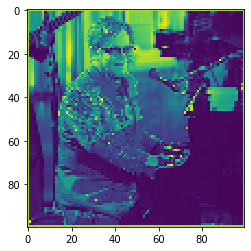

In [41]:
plt.imshow(img)

In [31]:
X_test.shape

(25, 100, 100, 1)

In [ ]:
model.save('celeb_face(5 celebs)')